# Demo for Archetypal Analysis

In [1]:
from time import time

import numpy as np
import pandas as pd

from Fungsi1 import *

from AA_Original_init import *

from PIL import Image
import sewar

### Load UWHVF dataset for testing

In [3]:
#read the data: part of UWHVF dataset from https://github.com/uw-biomedical-ml/uwhvf/tree/master

# Load the processed file
file_path = "dataset/VF_Sen_dataset_part_1.csv"  # Update path if necessary
df = pd.read_csv(file_path)

X = df.to_numpy()

### Do Archetypal Analysis with various initialization method

In [5]:
#The initialize parameter : random, random_idx, furthest_sum, furthest_first, k_means_pp, aa_pp, and aa_coreset
#change the initialize parameter if we want to try other initialization method
init_m = 'aa_coreset'

#trying to find optimum RSS for a range number of archetypes using Archetypal Analysis by changing the range of list
n_archs = list(range(20, 21))

duration = []
lst_exp_var = []
f = 1    # we can use this for loop. In the experiment, we loop it 5 times
for n_arch in n_archs:
    start_time = time.time()
    
    # do your work here
    AA = ArchetypalAnalysis1(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 10000, 
                        random_state = f, 
                        C = 0.0001, 
                        initialize = init_m,
                        redundancy_try = 60)
    
    archetypes = AA.fit(X)
    
    end_time = time.time()
    print('Duration: ',(end_time - start_time))
    duration.append(end_time - start_time)
    
    lst_exp_var.append(AA.RSS_2)
    print("RSS for no.",n_arch," is ",AA.RSS_2)

    df1 = pd.DataFrame(AA.archetypes)
    df1.to_csv(f'results/{init_m}/{f}/UWHVF_{init_m}{f}_{n_arch}.csv', index=False)
    df1a = pd.DataFrame(AA.alfa)
    df1a.to_csv(f'results/{init_m}/{f}/UWHVF_{init_m}{f}_alfa_{n_arch}.csv', index=False)
    df1b = pd.DataFrame(AA.beta)
    df1b.to_csv(f'results/{init_m}/{f}/UWHVF_{init_m}{f}_beta_{n_arch}.csv', index=False)
    AA._extract_closes_match()
    df1c = pd.DataFrame(AA.close_match)
    df1c.to_csv(f'results/{init_m}/{f}/UWHVF_{init_m}{f}_close_match_datapoint_{n_arch}.csv', index=False)

    df2 = pd.DataFrame(duration)
    df2.to_excel(f'results/{init_m}/{f}/UWHVF_{init_m}{f}_test_duration{n_arch}.xlsx', index=False)
    df2 = pd.DataFrame(lst_exp_var)
    df2.to_excel(f'results/{init_m}/{f}/UWHVF_{init_m}{f}_test_RSS{n_arch}.xlsx', index=False)
print('done')

Duration:  159.27857208251953
RSS for no. 20  is  1447939.6987161671
done


### Visualize the archetypes

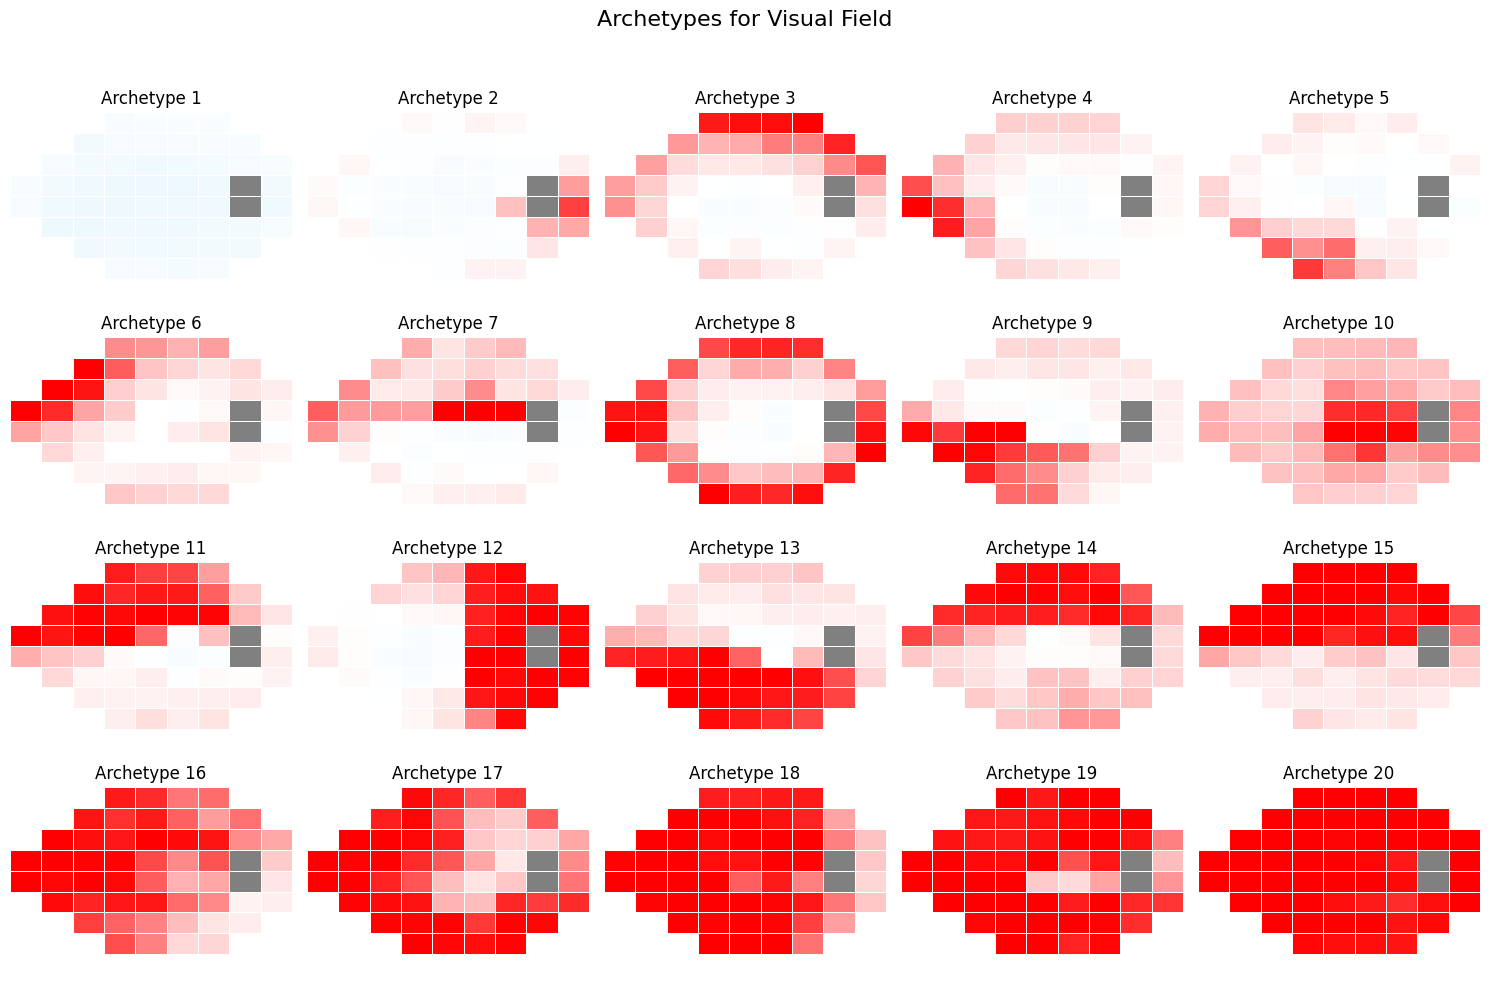

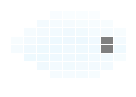

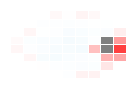

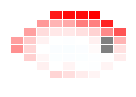

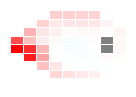

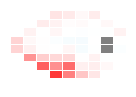

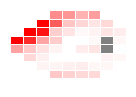

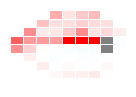

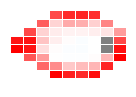

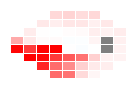

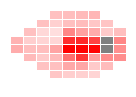

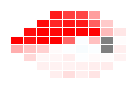

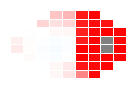

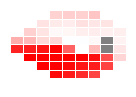

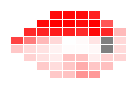

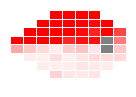

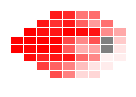

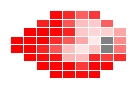

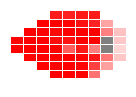

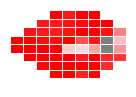

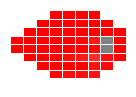

In [9]:
init_m = 'aa_coreset'

for i in range(20, 21):
    f = 1
    # transpose the content
    transpose_oriAA_result(f"results/{init_m}/{f}/UWHVF_{init_m}{f}_{i}.csv", f"results/{init_m}/{f}/UWHVF_{init_m}{f}_{i}x.csv")
    
    # change to 9x9 matrix 
    add_zeros_for24_2(f"results/{init_m}/{f}/UWHVF_{init_m}{f}_{i}x.csv", f"results/{init_m}/{f}/UWHVF_{init_m}{f}_{i}x.xlsx", 30)
    
    # read only the data (no header)
    dfm = pd.read_excel(f"results/{init_m}/{f}/UWHVF_{init_m}{f}_{i}x.xlsx")
    dfm = dfm.iloc[: , 1:]
    array_2d = dfm.to_numpy()
    array_2d_rounded = np.round(array_2d, 2)
    
    # save the visualisation 
    plot_result(f"results/{init_m}/{f}/img/UWHVF_{init_m}{f}_{i}_combined", array_2d_rounded, min=0, center=30, max=60, bsgrey=True)
   
    # save the visualisation
    # plot_result_onebyone(f"results/{init_m}/{f}/img/onebyone/UWHVF_{init_m}{f}_{i}x", array_2d_rounded, min=0, center=30, max=60, bsgrey=True)
    # for faster pairwise comparison, we can use smaller image
    plot_result_onebyone(f"results/{init_m}/{f}/img/onebyone/UWHVF_{init_m}{f}_{i}x", array_2d_rounded, min=0, center=30, max=60, fwidth=1.5, fheight=1, bsgrey=True)

### Copy all archetype images into one folder for pairwise comparison

In [19]:
import os
import shutil

# === Step 1: Define source folders and target folder ===
source_folders = [
    'results/aa_coreset/1/img/onebyone/',
    'results/aa_coreset/2/img/onebyone/',
    #'results/aa_coreset/3/img/onebyone/',
    #'results/aa_coreset/4/img/onebyone/',
    #'results/aa_coreset/5/img/onebyone/'
    # Add more folders if needed
]

target_folder = 'results/aa_coreset/all/'

# === Step 2: Create target folder if it doesn't exist ===
os.makedirs(target_folder, exist_ok=True)

# === Step 3: Copy and rename images to avoid overwriting ===
image_index = 1

for folder in source_folders:
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            source_path = os.path.join(folder, file)
            ext = os.path.splitext(file)[1]  # Get original extension (.jpg, .png, etc.)
            target_filename = f"img_{image_index:03d}{ext}"
            target_path = os.path.join(target_folder, target_filename)
            
            shutil.copy2(source_path, target_path)
            image_index += 1

print(f"✅ All images copied to '{target_folder}' with unique filenames.")


✅ All images copied to 'results/aa_coreset/all/' with unique filenames.


### Do pairwise comparison using SSIM (Structural Similarity Index Measure)

In [31]:
# Folders
folder1 = "results/aa_coreset/all/"
folder2 = "results/aa_coreset/all/"

# Get image filenames
images1 = [f for f in os.listdir(folder1) if f.endswith(".png")]
images2 = [f for f in os.listdir(folder2) if f.endswith(".png")]

# Create empty DataFrame for results
results = pd.DataFrame(index=images1, columns=images2)
start_time = time.time()

# Loop over all image pairs
for fname1 in images1:
    path1 = os.path.join(folder1, fname1)
    img1 = Image.open(path1).convert("RGB")
    arr1 = np.array(img1)

    for fname2 in images2:
        path2 = os.path.join(folder2, fname2)
        img2 = Image.open(path2).convert("RGB")
        img2 = img2.resize(img1.size)  # Resize to match if needed
        arr2 = np.array(img2)

        # Compute SSIM
        ssim_val, _ = sewar.full_ref.ssim(arr1, arr2)
        results.loc[fname1, fname2] = ssim_val

end_time = time.time()
print('Duration: ',(end_time - start_time))
# Save to CSV
results.to_csv("results/aa_coreset/all/ssim_pairwise_comparison.csv")
print("✅ Pairwise SSIM saved to ssim_pairwise_comparison.csv")


Duration:  64.19111371040344
✅ Pairwise SSIM saved to ssim_pairwise_comparison.csv


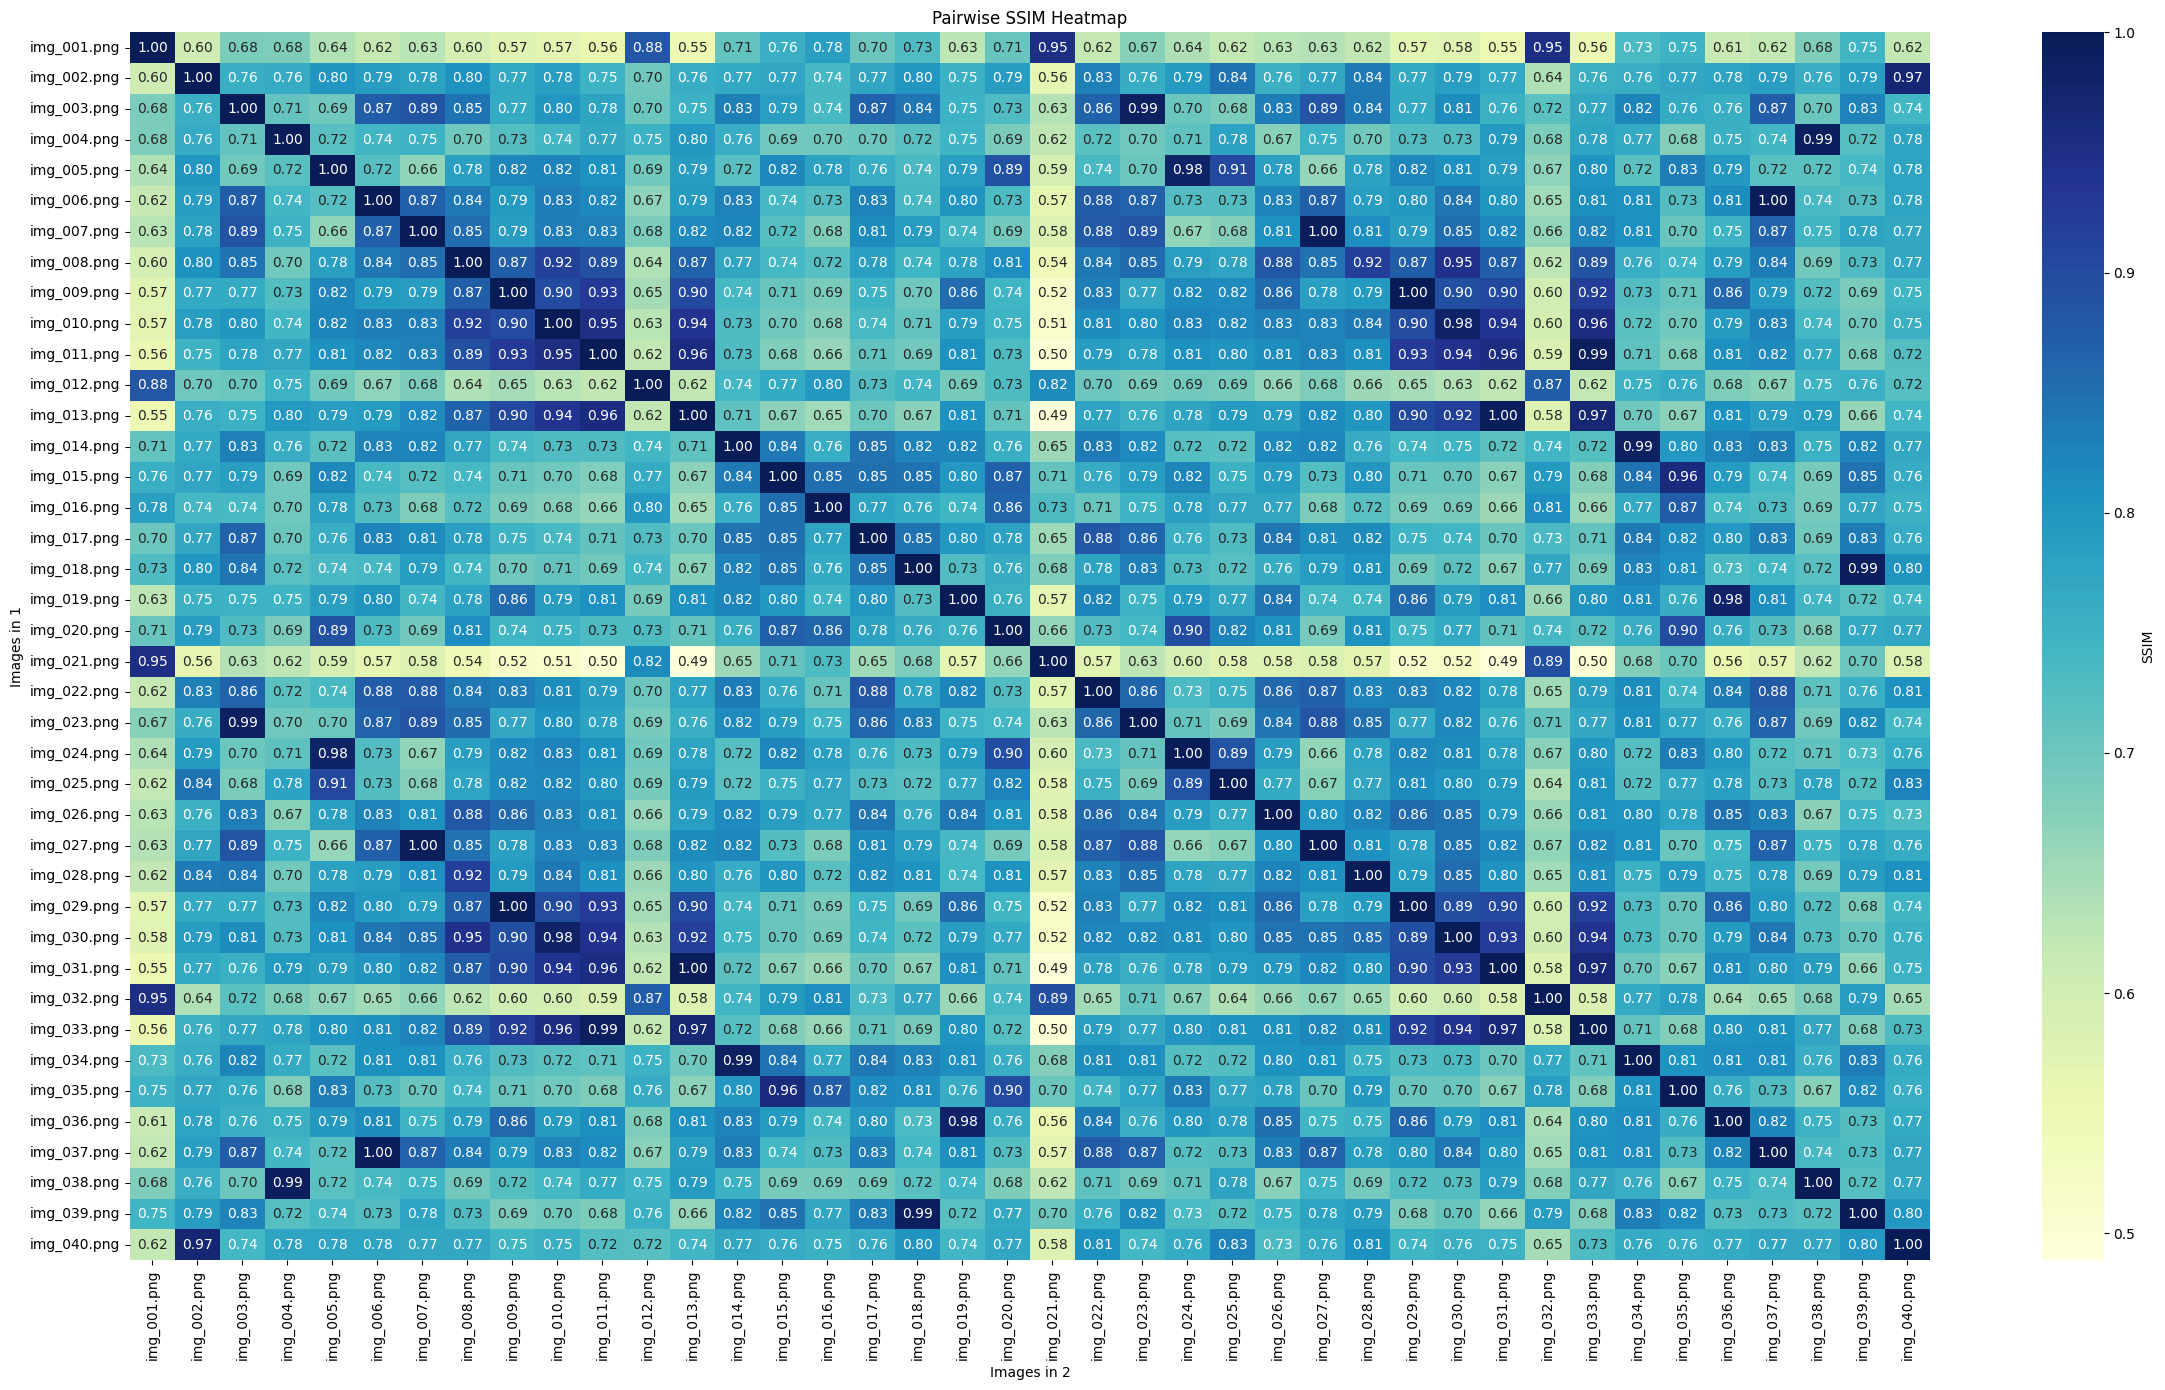

In [33]:
# Plot heatmap
plt.figure(figsize=(24, 14))
sns.heatmap(results.astype(float), cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'SSIM'})
plt.title("Pairwise SSIM Heatmap")
plt.xlabel("Images in 2")
plt.ylabel("Images in 1")
plt.tight_layout()

# Saving the figure.
plt.savefig("results/aa_coreset/all/ssim_pairwise_comparison.png")

plt.show()